In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Read and filter relevant indicators for Russia and Ukraine
df_russia = pd.read_csv('russia_eco_indicators.csv', skiprows=4)
df_ukraine = pd.read_csv('ukr_eco_indicators.csv', skiprows=4)

# Keep only selected indicators
indicators_to_keep = [
    'GDP (current US$)',
    'GDP growth (annual %)',
    'GDP per capita (current US$)',
    'Unemployment, total (% of total labor force) (national estimate)',
    'Inflation, consumer prices (annual %)',
    'Exports of goods and services (% of GDP)',
    'Imports of goods and services (% of GDP)',
    'External balance on goods and services (current US$)'
]

df_russia = df_russia[df_russia['Indicator Name'].isin(indicators_to_keep)]
df_ukraine = df_ukraine[df_ukraine['Indicator Name'].isin(indicators_to_keep)]

# Keep only year columns (plus 'Indicator Name')
year_cols = [str(year) for year in range(2014, 2024)]  # Adjust max year as needed
columns_to_keep = ['Indicator Name'] + year_cols
df_russia = df_russia[columns_to_keep]
df_ukraine = df_ukraine[columns_to_keep]

# Pivot to wide format with Indicator as column, Year as index
df_russia = df_russia.set_index('Indicator Name').T.reset_index().rename(columns={'index': 'Year'})
df_ukraine = df_ukraine.set_index('Indicator Name').T.reset_index().rename(columns={'index': 'Year'})

# Convert Year to int and values to float
df_russia['Year'] = df_russia['Year'].astype(int)
df_ukraine['Year'] = df_ukraine['Year'].astype(int)

# Convert all indicator columns to float
for col in indicators_to_keep:
    df_russia[col] = pd.to_numeric(df_russia[col], errors='coerce')
    df_ukraine[col] = pd.to_numeric(df_ukraine[col], errors='coerce')


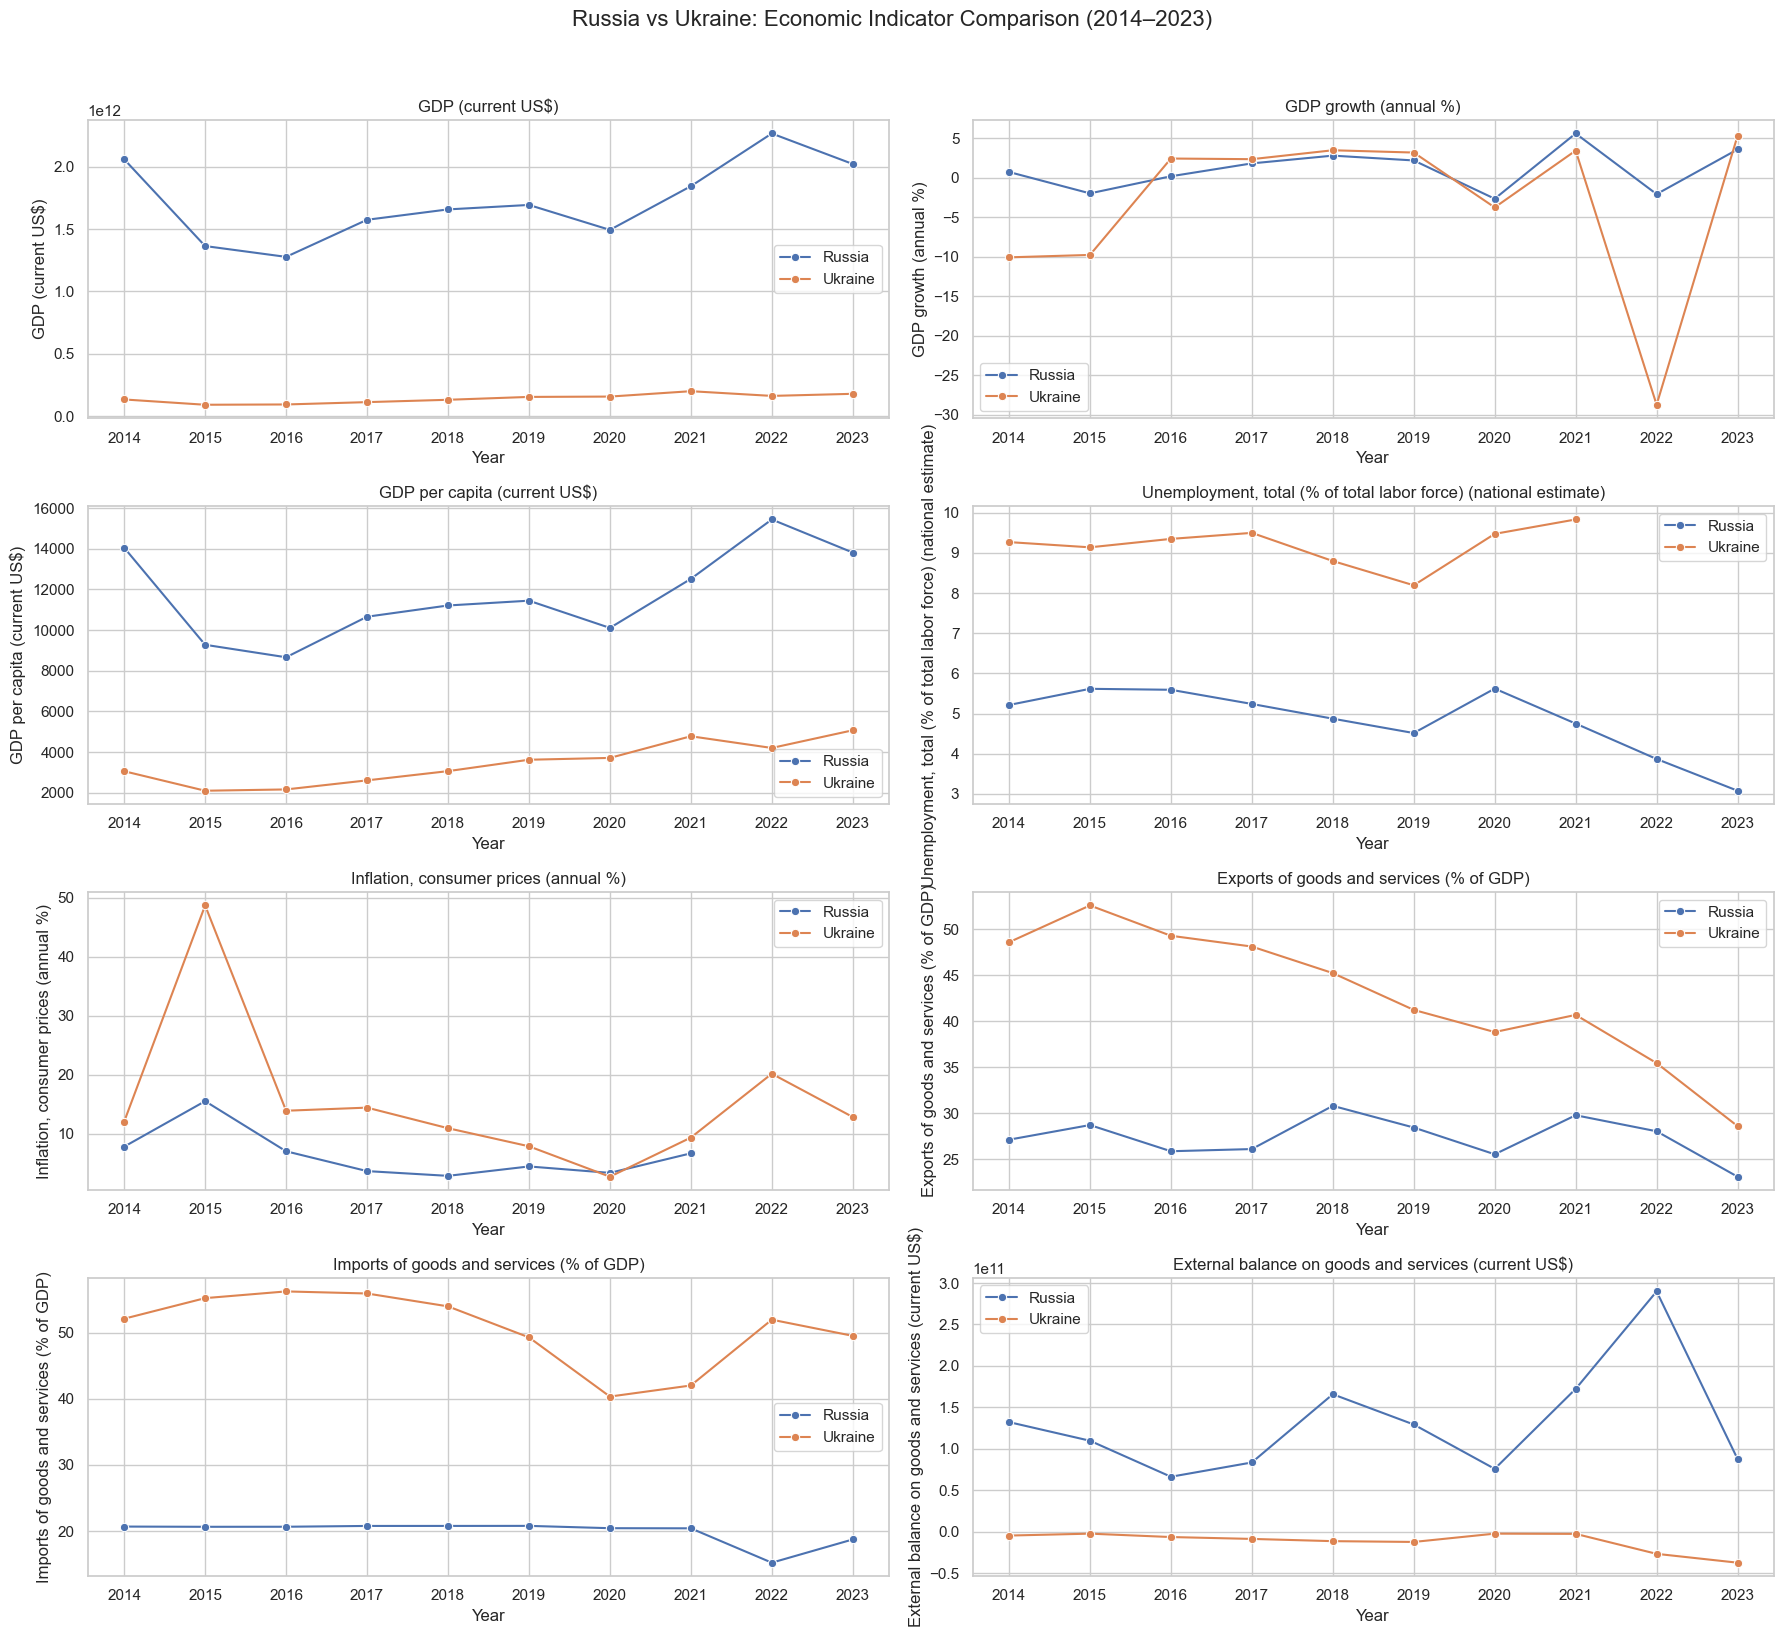

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams['axes.titlesize'] = 12

# List of indicators
indicators_to_keep = [
    'GDP (current US$)',
    'GDP growth (annual %)',
    'GDP per capita (current US$)',
    'Unemployment, total (% of total labor force) (national estimate)',
    'Inflation, consumer prices (annual %)',
    'Exports of goods and services (% of GDP)',
    'Imports of goods and services (% of GDP)',
    'External balance on goods and services (current US$)'
]

# Plot comparisons
plt.figure(figsize=(18, 16))
for i, indicator in enumerate(indicators_to_keep, 1):
    plt.subplot(4, 2, i)
    sns.lineplot(data=df_russia, x='Year', y=indicator, label='Russia', marker='o')
    sns.lineplot(data=df_ukraine, x='Year', y=indicator, label='Ukraine', marker='o')
    plt.title(indicator)
    plt.xlabel('Year')
    plt.ylabel(indicator)
    plt.xticks(ticks=[year for year in range(2014, 2024)])
    plt.legend()
    plt.tight_layout()

plt.suptitle("Russia vs Ukraine: Economic Indicator Comparison (2014–2023)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
